## Test with PyTorch

In [46]:
!pip install fastai duckduckgo_search pillow

In [47]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from time import sleep
from PIL import Image

In [11]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [29]:
searches = 'lucila','mosca domestica','piofila'
path = Path('type_insect')

# Train

In [33]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

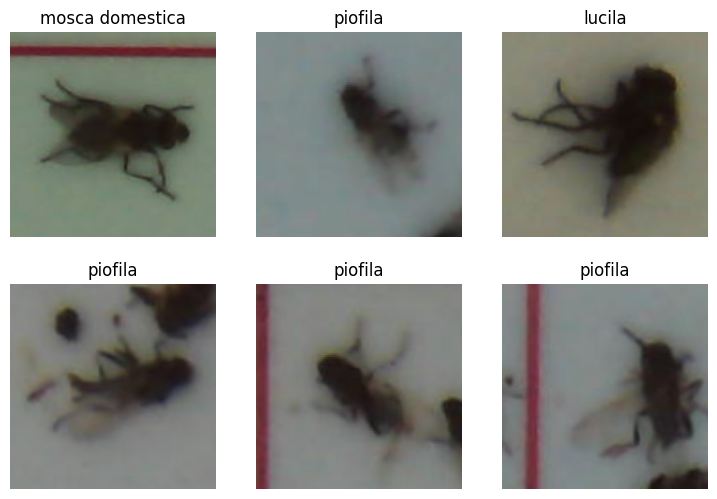

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.939441,0.239760,0.080952,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.097725,0.018042,0.004762,02:28
1,0.054748,0.004122,0.000000,03:03
2,0.054780,0.005449,0.004762,03:14
3,0.031624,0.001267,0.000000,02:38
4,0.023732,0.001523,0.000000,02:56


In [36]:
learn.save('insectaCamModel')

Path('models/insectaCamModel.pth')

# Test

In [55]:
from PIL import Image

# Definisci il percorso dell'immagine
image_path = 'test.png'  # Sostituisci con il percorso corretto dell'immagine

# Esegui la previsione
is_mosquito, _, probs = learn.predict(PILImage.create(image_path))

# Stampa le probabilità per ogni classe
print(f"Probability for Lucila: {probs[0]:.4f}")
print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
print(f"Probability for Piofila: {probs[2]:.4f}")


Probability for Lucila: 0.0007
Probability for Mosca Domestica: 0.0005
Probability for Piofila: 0.9989
